In [1]:
# #### PARAMETERS::: REPLACE INTEGER VALUES WITH DESIRED LATITUDES AND LONGITUDES
## make sure lowlat or lowlon is LESS THAN uplat or uplon since no test is done below to simplify the code

lowlat = -5 #LOWER LATITUDE value (-180:180)
uplat = 20 #HIGHER LATITUDE value (-180:180)
lowlon = -75 #LOWER LONGITUDE value (-180:180)
uplon = -45 #HIGHER LONGITUDE value (-180:180)


In [2]:
def by_region(uplat, lowlat, uplon, lowlon):
    
    
    ### BY REGION FUNCTION: COMMITTED 7//12//2022 BY MEG R
    ### Takes a given latitude and longitude range, returns a merged dataset containing all Saildrone data for the given region. 
    ### A variable is kept to discern which Saildrone cruise reported what data. 
    ### Also returns a plot to confirm whether there are or are not data points within your given region. Points will be obvious and be colored by temperature. 
    
    
    
    ### IMPORTING LIBRARIES
    import numpy as np
    import pandas as pd
    import xarray as xr
    import matplotlib.pyplot as plt 
    import datetime as dt
    import cartopy.feature as cfeature
    import cartopy.crs as ccrs
    import warnings 
    import matplotlib.dates as mdates
    import glob
    import os

    warnings.simplefilter('ignore') 

    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    from calendar import month_abbr
    
    
    #pulling saildrone data and returning files in fns list. This is where data is first stored. 
    ddir = '../saildrone_data/'
    fns = glob.glob(ddir+'*.nc')
    
    
    
    ### PARAMETERS?????? ASK ABOUT THIS
    
    ### Initializing name list and length of such as 0
    saildrone_name_list = []
    #nameList_len = len(saildrone_name_list)
    ltime, llat, llon, ltemp, lsal, ltime = list(), list(), list(), list(), list(), list()
    ### Filtering data: ds2 = lat, ds3 = lon. 
    for i in fns: ## Going through all files in fns
        ds = xr.open_dataset(i)  # Opening all files to read data
        ds2 = ds.where((ds.lat > lowlat) & (ds.lat < uplat), drop = True) ## Creates new data set for all LATITUDE points, dropping points that are not within range and are returning as nans
        ds3 = ds2.where((ds2.lon > lowlon) & (ds2.lon < uplon), drop = True) ##  ## Creates new data set for all LONGITUDE points, dropping points that are not within range and are returning as nans

        ds.close()

        if ((len(ds3.lon) > 0)): #takes data and makes a multidimensional variable lists so DATA is returned, not just names of files. 
            ### IF loop within FOR loop reading whether or not the data points are within regional bounds, then adding corresponding data (name of file, time, lat, lon, temp, and salinity) 
            saildrone_name_list.append(i)
            ltime.extend(ds3.time.data)
            llat.extend(ds3.lat.data)
            llon.extend(ds3.lon.data)
            ltemp.extend(ds3.TEMP_CTD_MEAN.data)
            lsal.extend(ds3.SAL_CTD_MEAN.data)



    dind = [*range(len(ltime))]  ## Dummy index to create a coordinate for the dataset to increase linearly.       

    ds_new = xr.Dataset( ## Creates new merged dataset containing all data, using the dummy index in order to prevent randomosity in time data. This makes each data point organized. 
        data_vars=dict(
            time = (['pt'], ltime),
            latitude=(['pt'], llat),
            longitude=(['pt'], llon),
            temperature = (['pt'], ltemp),
            salinity = (['pt'], lsal),),
            coords=dict(pt=dind))

    nameList_len = len(saildrone_name_list) #print this to see how many Saildrone files contain data. 
    
    
    region = np.array([[uplat,lowlat],[lowlon,uplon]]) # numpy array that specifies the lat/lon boundaries of our selected region for the plot
    
    ### Visual plot attributes. Use this plot to make sure that there are data points within your regional boundaries. 
    fig = plt.figure(figsize=(16,10), dpi = 72) 

    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='50m',
            facecolor='none')
    ax = plt.axes(projection=ccrs.PlateCarree()) 
    ax.coastlines(resolution='10m',linewidth=1,color='black') 
    ax.add_feature(cfeature.LAND, color='grey', alpha=0.3)
    ax.add_feature(states_provinces, linewidth = 0.5)
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent([region[1,0],region[1,1],region[0,0],region[0,1]],crs=ccrs.PlateCarree()) 
    ax.set_xticks(np.round([*np.arange(region[1,1],region[1,0]+1,2)][::-1],0), crs=ccrs.PlateCarree()) 
    ax.set_yticks(np.round([*np.arange(region[0,0],region[0,1]+1,1)],0), crs=ccrs.PlateCarree()) 
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.gridlines(linestyle = '--', linewidth = 0.5)
    plt.title('Latitude and Longitude Data Points Within Region: ', fontdict = {'fontsize' : 16})



    ## scatter for lon and lat. If there is Saildrone data within given parameters, then points will be plotted with color corresponding to temp. 
    sc = plt.scatter(x = llon, y = llat, c= ltemp, cmap = 'jet') 


    
    
    
    return ds_new

    
    
    
    

<xarray.Dataset>
Dimensions:      (pt: 631)
Coordinates:
  * pt           (pt) int64 0 1 2 3 4 5 6 7 ... 623 624 625 626 627 628 629 630
Data variables:
    time         (pt) datetime64[ns] 2020-01-17T00:03:30 ... 2020-03-01T15:02...
    latitude     (pt) float64 11.75 11.63 11.48 11.36 ... 8.38 8.817 8.71 8.587
    longitude    (pt) float64 -56.09 -56.05 -56.01 ... -51.65 -51.54 -51.42
    temperature  (pt) float64 27.34 27.34 27.37 27.33 ... 26.89 26.78 26.87
    salinity     (pt) float64 35.34 35.31 35.32 35.35 ... 36.23 36.2 36.25 36.24

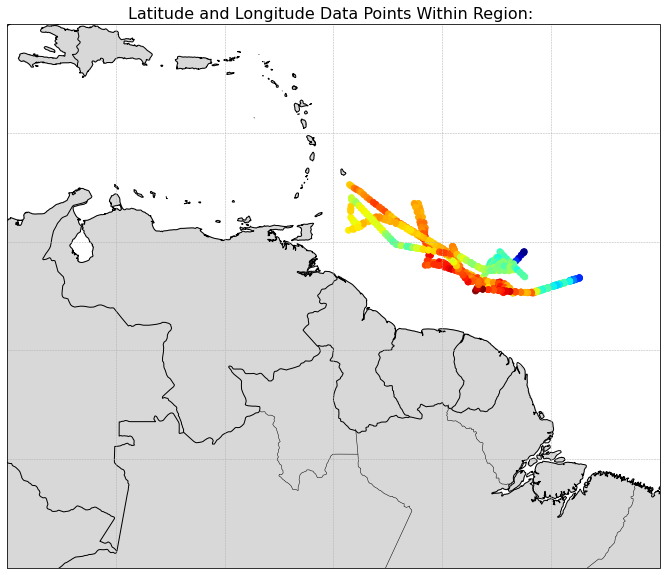

In [4]:
by_region(uplat, lowlat, uplon, lowlon)